**Рабочая директория на ShadBox:**

/hse/amironov/Task3

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
import numpy as np
from IPython.display import display,Image

**Выведем ибупрофен по его SMILES.**

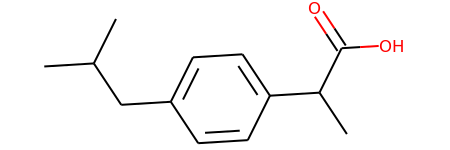

In [5]:
ibu=Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu)
display(ibu)

**В ибупрофене надо заменить изопропил на ацетилен.**

Изопропил:  $CH_3−CH−CH_3$. <br />
Ацетилен имеет формулу:  $HC≡CHHC≡CH$.

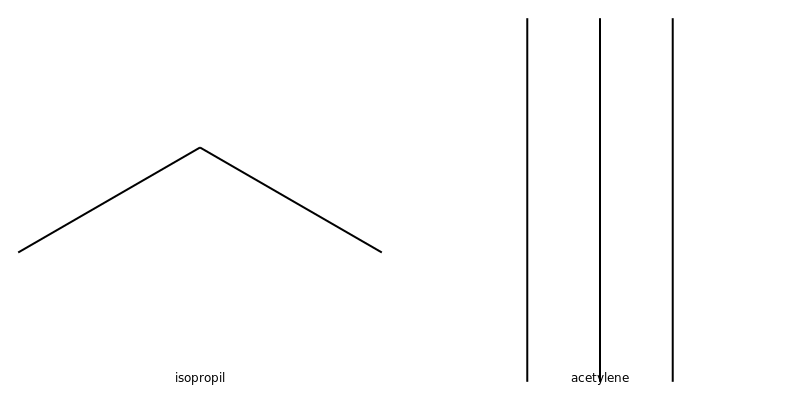

In [9]:
isopropil=Chem.MolFromSmiles('CCC')
acetylene=Chem.MolFromSmiles('C#C')
Draw.MolsToGridImage([isopropil,acetylene], molsPerRow=2,subImgSize=(400,400), legends = ['isopropil','acetylene'])

**В записи SMILES для ибупрофена надо заменить CC(C) в начале на C#C.**

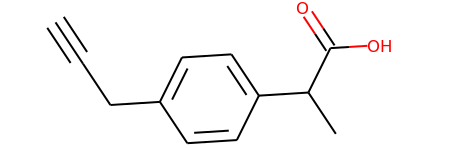

In [12]:
ibu_mod=Chem.MolFromSmiles('C#CCC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu_mod)
display(ibu_mod)

**Ищем на сайте PubChem все радикалы c азидом для Click Chemistry и скачиваем их SMILES нотации**

Названия азидов в номенклатуре IUPAC образуются присоединением суффикса «-азид» к названию радикала, например, $C_6H_5N_3$ - фенилазид, $C_6H_5CON_3$ - бензоилазид, $(CH_3)_3SiN_3$ - триметилсилилазид.

По радикалу, соединенному с азидной группой, различают алифатические и ароматические азиды (алкилазиды и арилазиды), а также азиды карбоновых кислот $RCON_3$ (ацилазиды).

Таким образом, поиск радикалов с азидами в pubchem можно так: advanced search -> IUPAC: 'azide'

Получаем 3592 записи в качестве результата.

Будем осуществлять азид-алкиновое циклоприсоединение (классический вариант). В классическом варианте реакция идет по механизму 1,3-диполярного присоединения ведёт к образованию смеси изомерных 1,4- и 1,5-дизамещенных 1,2,3-триазолов:

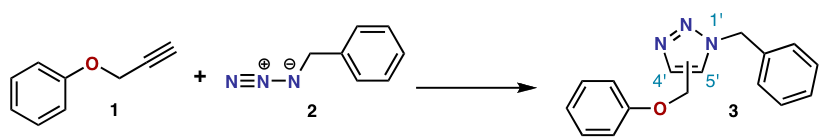

In [13]:
Image('Huisgen.png')

**Загрузим скачанные данные и отфильтруем:**

In [66]:
tmp = file('azide_radicals.txt').read().splitlines()
strings = [i.split('\t', 1)[1] for i in tmp]

In [74]:
# Проверим:
strings[0:10]

['CC(C)CC(C(=O)N)C(=O)N=[N+]=[N-]',
 'C1=C(C=C(C(=C1[N+](=O)[O-])Br)C(=O)N=[N+]=[N-])[N+](=O)[O-]',
 'C1=C(C=C(C(=C1[N+](=O)[O-])Cl)C(=O)N=[N+]=[N-])[N+](=O)[O-]',
 'C1=CC=C(C(=C1)C(=O)N=[N+]=[N-])OCC(=O)N=[N+]=[N-]',
 'CC(C)CC(C#N)C(=O)N=[N+]=[N-]',
 'CC(C)CCCC(=O)N=[N+]=[N-]',
 'C1=CC=C2C=C(C=CC2=C1)NC(=O)C(=O)N=[N+]=[N-]',
 'C1=C(C=C(C(=C1[N+](=O)[O-])C(=O)N=[N+]=[N-])[N+](=O)[O-])[N+](=O)[O-]',
 'C1=CC=C(C(=C1)C(=O)N=[N+]=[N-])S(=O)(=O)N',
 'CN(C)C1=C(C=C(C=C1[N+](=O)[O-])C(=O)N=[N+]=[N-])[N+](=O)[O-]']

In [68]:
len(strings)

3592

In [69]:
smiles = list()
# фильтруем:
for smile in strings:
    if not '.' in smile and len(smile) < 30:
        smiles.append(smile)

In [72]:
smiles[0:5]

['CC(C)CC(C#N)C(=O)N=[N+]=[N-]',
 'CC(C)CCCC(=O)N=[N+]=[N-]',
 'CSCCCCCCC(=O)N=[N+]=[N-]',
 'C1CC(SC1)C(=O)N=[N+]=[N-]',
 'CC(C)[C@H](C(=O)N=[N+]=[N-])O']

In [120]:
len(smiles)

317

**Заменим в найденых радикалах азидную группу на модифцированный ибупрофен и превратим новые SMILES в объекты-молекулы**

Подбираем корректную замену:

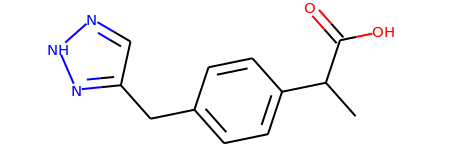

In [114]:
tmp=Chem.MolFromSmiles('N1N=C(C=N1)CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(tmp)
display(tmp)

Заменяем:

In [138]:
template = 'N1N=C(C=N1)CC1=CC=C(C=C1)C(C)C(=O)O'
newsmiles = list()

for smile in smiles:
    newsmile=smile.replace('N=[N+]=[N-]',template)
    newsmiles.append(newsmile)

Смотрим пример:

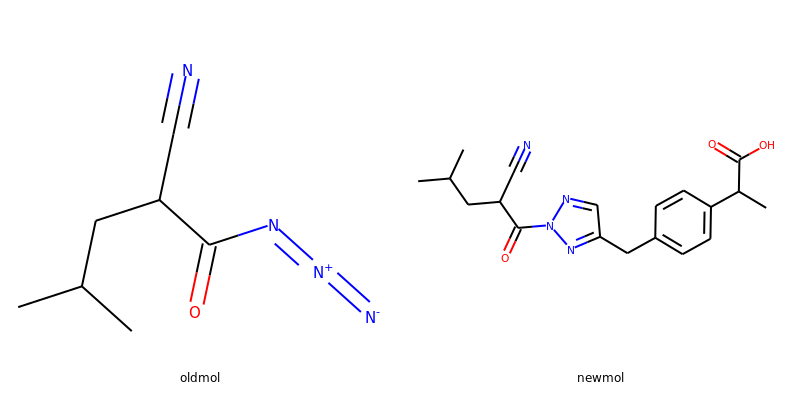

In [139]:
oldmol=Chem.MolFromSmiles(smiles[0])
newmol=Chem.MolFromSmiles(newsmiles[0])

Draw.MolsToGridImage([oldmol,newmol], molsPerRow=2,subImgSize=(400,400), legends = ['oldmol','newmol'])

**Отберем молекулы, которые удовлетворяют "правилу пяти" Lipinski**

In [129]:
import rdkit.Chem.Lipinski as Lipinksy

ibu_mod=Chem.MolFromSmiles('C#CCC1=CC=C(C=C1)C(C)C(=O)O')

print Lipinksy.NumHDonors(ibu)
print Lipinksy.NumHAcceptors(ibu)
print Lipinksy.rdMolDescriptors.CalcExactMolWt(ibu)
print Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(ibu)[0]

1
1
206.130679816
3.0732


В "правиле пяти" Липинского говорится, что в общем случае устно активное лекарственное средство имеет не более одного нарушения следующих критериев:

- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- An octanol-water partition coefficient[5] log P not greater than 5

In [135]:
def checklipinsky(mol):
    l = [0] * 4
    if Lipinksy.NumHDonors(mol)<=5:
        l[0] = 1
    if Lipinksy.NumHAcceptors(mol)<=10:
        l[1] = 1
    if Lipinksy.rdMolDescriptors.CalcExactMolWt(mol)<500:
        l[2] = 1
    if Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(mol)[0]<=5:
        l[3] = 1
    
    return sum(l)>=3

In [137]:
# проверим
checklipinsky(ibu)

True

In [142]:
newsmiles_filt = list()
for newsmile in newsmiles:
    try:
        mol = Chem.MolFromSmiles(newsmile)
        if checklipinsky(mol):
            newsmiles_filt.append(newsmile)
    except:
        pass

In [143]:
len(newsmiles_filt)

317

-> все новые молекулы удовлетворяют "правилу пяти" Липински

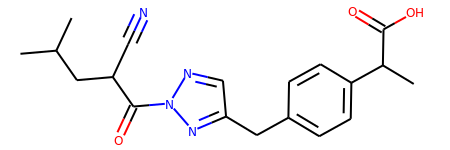

In [144]:
tmp=Chem.MolFromSmiles(newsmiles_filt[0])
AllChem.Compute2DCoords(tmp)
display(tmp)